# Final report for simulation program



## Introduction
this report will show the code of our program and explain the code how it works <br>
it is divided into 4 sections: <br>
- import
- SEIR equation
- class interface
- main window

Due to the fact that our group make an interative window that let users to chose the parameter, it is hard to show the plot directly <br> in the jupyter notebook. Thus, apart from showing the whole works, the plot part will be extracted from the class, and __show individually in the appendix__. 

## Import

In [67]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import matplotlib.animation as animation
import tkinter as tk

In this program, 6 module were imported :
- matplotlib.pyplot to plot the graph
- solve_ivp to solve the differental equation
- FigureCanvasTkAgg to put the canvas on the frame
- numpy to set the range
- matplotlib.animation to plot the animation graph
- tkinter to create the interactive window


## SEIR model equation

In [56]:
def seir_model(t, y, beta, sigma, gamma):   
    S, E, I, R= y
    dSdt=-beta*I*S
    dEdt=-sigma*E+beta*I*S
    dIdt=-gamma*I+sigma*E
    dRdt=gamma*I
    return dSdt, dEdt, dIdt, dRdt

# set the inital value for the parameter
days=100  
beta=2.2/2.3
sigma=1/5.2
gamma=1/2.3
Tinc=5.2
Tinf=2.3
R0=2.2

This differental equation is called SEIR model of infectious disease progression. it is an mathematical model that will simulate the speard of the disease. <br> 
there are four parameter in the equation: __S E I R__ , and they relate to there parameters : __Tinc, Tinf, R0__ <br>
- Tinc is incubation period in days (in covid-19 it is usually 5.2 days )
- Tinf is infectious period in days (in covid-19 it is usually 2.3 days )
- R0 is the Reproduction Number (in covid-19 it is usually 2.2) <br>
the relation between the parameter is: <br> 
- sigma=1/Tinc
- gamma=1/Tinf
- beta= R0*gamma= R0/Tinf




## Class interface

###   init  function:

In [ ]:
class interface:

the code above is the __init__ function of the class, it will generate two frames 

### parameter_explain function:

In [ ]:
class interface(interface):
    def parameter_explain(self):
            self.vari.set(f"the simulation days is now: {self.days}"
                        f"\n incubation period is now: {self.Tinc}" 
                        f"\n infectious period is now: {self.Tinf}"
                        f"\n Reproduction Number is now: {self.R0}"
                        )

The function above is a function that will update the parameter information that user entered.
- use __f strings__ to show the content clearly, and __\n__ to change the line.
- use __vari.set__ to set the change of the information

### Static line graph function:

In [66]:
class interface(interface):
    def graph(self):
            '''
            the function below will produce a line graph based on the default parameter or the parameter 
            user entered.
            '''
            # the code below will return the solution of the seir differential equation as a list
            # the inital value is s0=0.99 e=0.01 i=0 r=0
            sol = solve_ivp(seir_model, [0,self.days], [1-1/20000, 1/20000, 0, 0], 
                        rtol=1e-6, args=(self.beta, self.sigma, self.gamma))

            # create a graph 
            fig = plt.figure(); ax = fig.gca()

            # plot the lines on the graph  according to the list above, 4 lines total 
            lines = ax.plot(sol.t, sol.y.T)

            #basic settings of the graph: legend, xlabel, ylabel, title and return the graph finally.
            ax.legend(lines, ['Susceptible', 'Exposed', 'Infected', 'Recovered']);
            ax.set_xlabel('days')
            ax.set_ylabel('proportion')
            ax.set_title('Line graph for SEIR model')
            return plt.gcf()

The function above will return a line graph if user click to show the line graph:<br>
- Line 9 to 10 use __solve_ivp__ module to solve the differental equation in x range [0,self.days], using intial value:<br>
  s0=1-1/20000, e0=1/20000, i0=0, r0=0 <br>
  it will use the present parameter value to solve the equaition and return the outcome as a list.<br>
- Line 16 plots the 4 lines according to the list, sol.t contains x axis value, sol.y.T contains S E I R value.
- Line 19-23 set the legend, x label,y label, title of the lines, and return the garph
-(the graph will be shown in the appendix)


### Animated line graph function:

In [82]:
 class interface(interface):
    def openLineWindow(self):
        '''
        This function helps to open a new window where it shows the SEIR animation line graph 
        based on the default parameter or the parameter user entered.
        '''
        
        # create a window to show the graph, set the title of the window.
        global LineWindow
        LineWindow = tk.Toplevel(main_window)
        LineWindow.title("Line graph for simulation")
        
        
        # create a frame on the window designed to put the canvas on it
        frame_x =tk.Frame(LineWindow)
        frame_x.pack(fill='both', side='left')
        
        # solve the differential equation, return a list
        sol = solve_ivp(seir_m, [0, self.days], [1-1/20000, 1/20000, 0, 0], 
                    rtol=1e-6, args=(self.beta, self.sigma, self.gamma))
        s, e, i, r = sol.y
        
        # record the lens of the list which will be used later
        x=len(sol.t)
        
        # set up the figure, subplot, and x, y axes range
        fig= plt.Figure() 
        axes = fig.add_subplot(111)
        axes.set_ylim(0, 1.1)
        axes.set_xlim(0, self.days)
        
        # plot the 4 lines according to the data returned from the anmation function below from the inital value
        line, =axes.plot(0, 1-1/20000,linewidth=2,color='blue')
        line1, =axes.plot(0, 1/20000,linewidth=2,color='black')
        line2, =axes.plot(0, 0,linewidth=2, color='red')
        line3, =axes.plot(0, 0,linewidth=2, color='green')
        
        # basic setting of the graph: the style of the graph, legend, xlabel, ylabel and title
        plt.style.use("ggplot")
        axes.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered']);
        axes.set_xlabel('days')
        axes.set_ylabel('proportion of all')
        axes.set_title('Animation line graph for SEIR model')
        
        # create 5 empty lists that will be used to store x ,s,e,i,r value in the following function
        x1, y1, y2, y3, y4 = [], [], [], [], []
        
        def animate(a):
            '''
            this animate() function will set the data for the FuncAnimation, 
            update the data from the listed created above and return the 4 lines' data 
            ready to be plotted.
            '''
            x1.append((sol.t[a]))
            y1.append((s[a]))
            y2.append((e[a]))
            y3.append((i[a]))
            y4.append((r[a]))
            
            line.set_xdata(x1)
            line.set_ydata(y1)
            line1.set_xdata(x1)
            line1.set_ydata(y2)
            line2.set_xdata(x1)
            line2.set_ydata(y3)
            line3.set_xdata(x1)
            line3.set_ydata(y4)
            
            return line, line1, line2, line3, 
        
        #create a canvas that show the animation graph on the canvas
        canvas = FigureCanvasTkAgg(fig, master=frame_x)
        canvas.get_tk_widget().pack()
        
        # create animation using FuncAnimation
        anim = animation.FuncAnimation(fig, animate, np.arange(1, x), interval=25, repeat=False)
        
        # loop the window until the user close the window.
        LineWindow.mainloop()

The function above will open a new window showing an animated graph if user click to show the animated graph:<br>
- Line 9 use __tk.Toplevel()__ to create the toplevel windows which are directly managed by the window. the graph will be displayed on the window
- Line 15 create a frame_x using __tk.Frame__ on the window
- Line 19-21 create the result lists
- Line 27-30 is about the setting of graphs.(figure and subplot. x,y ranges)
- Line 33-36 use line, (if it is not used, the graph can't be shown properly), set the inital value, linewidth and color.
- Line 39-43 set the style of the graph "ggplot", set the legend, xy_label and title.
- Line 48-69 is a __animate()__ function that set the x,y data to line according to the list appended. this function will be used to generate the animation.
- Line 72-73 create a canvas using __FigureCanvasTkAgg()__ to show the figure which placed on the frame_x
- Line 76 use __animation.FuncAnimation__ to generate animation graph from the range 1 to x at an interval of 25
- Line 79 indicate that the window will run untill it is closed by the user.


## Main window

In [ ]:
# create a window
main_window = tk.Tk()

# basic setting of the window: the sizw of the window and the title of the window
main_window.title('simulation for COVID-19')

# create a label, set the width height and font and show it on the window
main_window.geometry('1000x700')
label= tk.Label(text='simulated graph for COVID-19',font=('Arial',25),
                 width=33,height=1)
label.pack()

# use class interface to show two frames and achieve the interactive function
interface(main_window)

main_window.mainloop()

The code above creates the main window, set the title size and a label showing simulated graph for COVID-19.
- use __interface class__ created above to show the content like the picture below: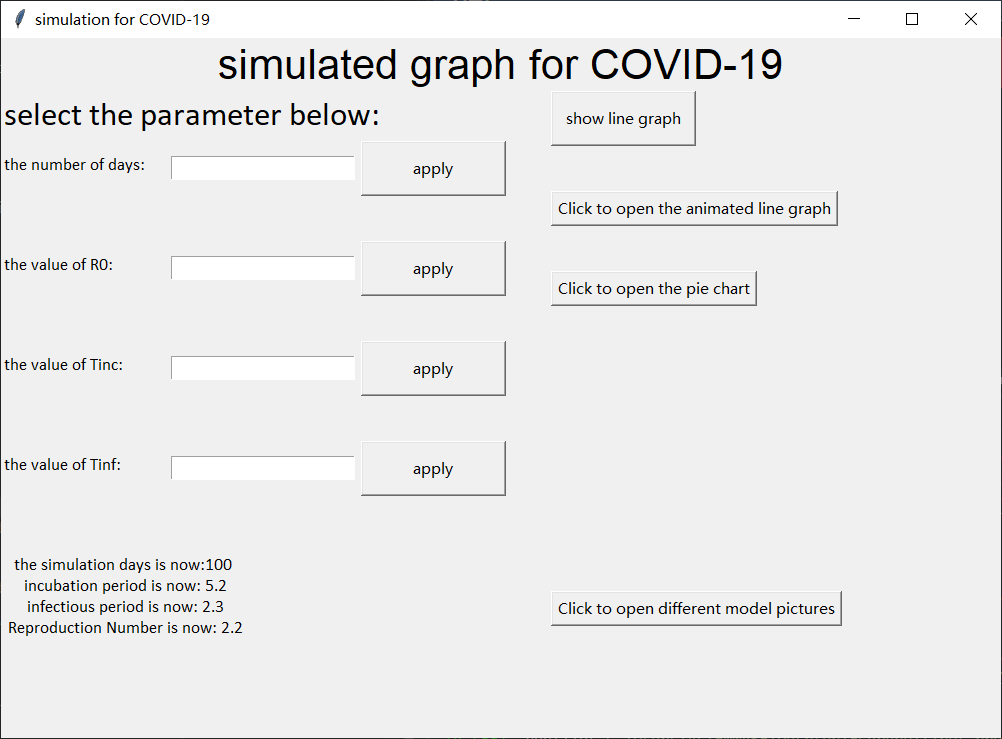

## Appendix (graph show)


The graphs in the appendix and the code is slightly adjusted to pull it out of class. However, they almost share the same code.<br>the graphs use the inital parameter value in the appendix.Parameter can be changed in the window when the program running in Spyder.

###  1.Animated line graph

<IPython.core.display.Javascript object>


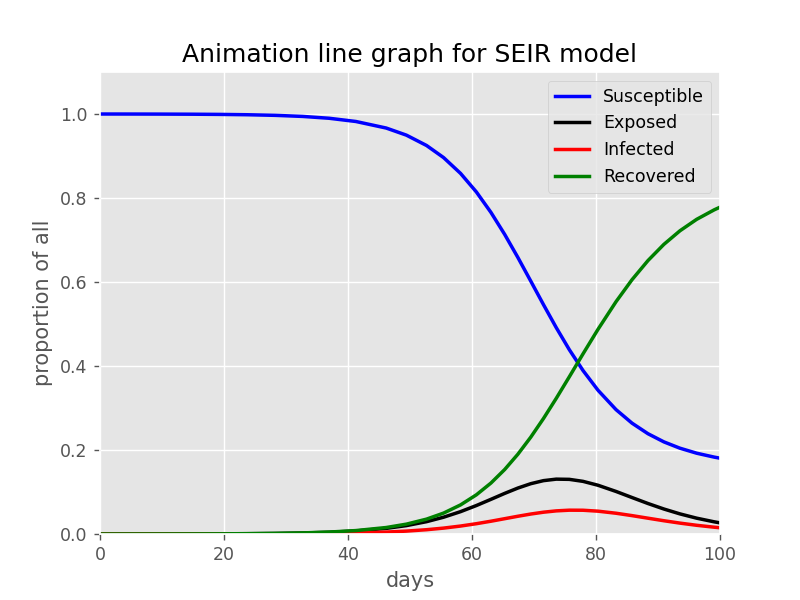

In [80]:
%matplotlib notebook
import matplotlib.pyplot as plt	
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.animation as animation


days=100  
beta=2.2/2.3
sigma=1/5.2
gamma=1/2.3
Tinc=5.2
Tinf=2.3
R0=2.2


def seir_m(t, y, beta, sigma, gamma):   
    S, E, I, R= y
    dSdt=-beta*I*S
    dEdt=-sigma*E+beta*I*S
    dIdt=-gamma*I+sigma*E
    dRdt=gamma*I
    return dSdt, dEdt, dIdt, dRdt


sol = solve_ivp(seir_m, [0, days], [1-1/20000, 1/20000, 0, 0], 
                    rtol=1e-6, args=(beta, sigma, gamma))
s, e, i, r = sol.y

# record the lens of the list which will be used later

# set up the figure, and x, y axes range
fig, axes = plt.subplots()
axes.set_ylim(0, 1.1)
axes.set_xlim(0, days)

# plot the 4 lines according to the data returned from the anmation function below from the inital value
line, =axes.plot(0, 0.99,linewidth=2,color='blue')
line1, =axes.plot(0, 0.01,linewidth=2,color='black')
line2, =axes.plot(0, 0,linewidth=2, color='red')
line3, =axes.plot(0, 0,linewidth=2, color='green')

x=len(sol.t)
 
# basic setting of the graph: the style of the graph, legend, xlabel, ylabel and title
axes.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered']);
axes.set_xlabel('days')
axes.set_ylabel('proportion of all')
axes.set_title('Animation line graph for SEIR model')

# create 5 empty lists that will be used to store x ,s,e,i,r value in the following function
x1, y1, y2, y3, y4 = [], [], [], [], []

def animate(a):
    '''
    this animate() function will set the data for the FuncAnimation, 
    update the data from the listed created above and return the 4 lines' data 
    ready to be plotted.
    '''
    x1.append((sol.t[a]))
    y1.append((s[a]))
    y2.append((e[a]))
    y3.append((i[a]))
    y4.append((r[a]))

    line.set_xdata(x1)
    line.set_ydata(y1)
    line1.set_xdata(x1)
    line1.set_ydata(y2)
    line2.set_xdata(x1)
    line2.set_ydata(y3)
    line3.set_xdata(x1)
    line3.set_ydata(y4)

    return line, line1, line2, line3, 

# create animation using FuncAnimation
anim= animation.FuncAnimation(fig, animate, np.arange(1, x), interval=25, repeat=False)


### 2. Line graph

<IPython.core.display.Javascript object>


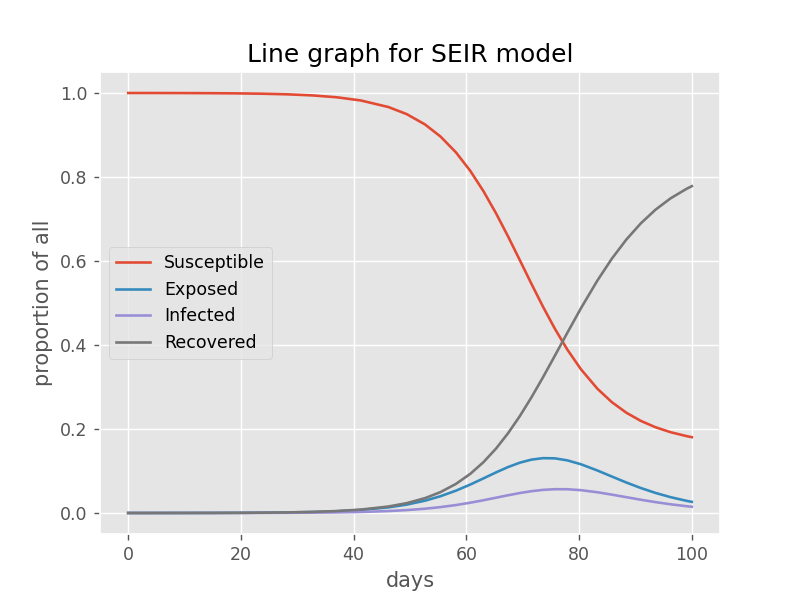

In [81]:
sol = solve_ivp(seir_m, [0,days], [1-1/20000, 1/20000, 0, 0], 
                    rtol=1e-6, args=(beta, sigma, gamma))
        
# create a graph 
fig = plt.figure(); ax = fig.gca()

# plot the lines on the graph  according to the list above, 4 lines total 
line = ax.plot(sol.t, sol.y.T)

#basic settings of the graph: legend, xlabel, ylabel, title and return the graph finally.
ax.legend(lines, ['Susceptible', 'Exposed', 'Infected', 'Recovered']);
ax.set_xlabel('days')
ax.set_ylabel('proportion')
ax.set_title('Line graph for SEIR model')
plt.show()

### 3. Pie chart